In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [14]:
raw_data_path = os.path.join(os.path.pardir,'data','raw','DataFiles')

ncaa_tourney_compact = os.path.join(raw_data_path, 'NCAATourneyCompactResults.csv')
ncaa_tourney_detailed = os.path.join(raw_data_path, 'NCAATourneyDetailedResults.csv')

#reg_season_compact = os.path.join(raw_data_path, 'RegularSeasonCompactResults.csv')
reg_season_compact = os.path.join(os.path.join(os.path.pardir,'data','raw','PrelimData2018'), 'RegularSeasonCompactResults_Prelim2018.csv')
reg_season_detailed = os.path.join(os.path.join(os.path.pardir,'data','raw','PrelimData2018'), 'RegularSeasonDetailedResults_Prelim2018.csv')

sample_sub = os.path.join(os.path.pardir,'data','raw','SampleSubmissionStage1.csv')
sample_sub2 = os.path.join(os.path.pardir,'data','raw','SampleSubmissionStage2.csv')

df_ncaa_tourney_compact = pd.read_csv(ncaa_tourney_compact)
df_ncaa_tourney_detailed = pd.read_csv(ncaa_tourney_detailed)

df_reg_season_compact = pd.read_csv(reg_season_compact)
df_reg_season_detailed = pd.read_csv(reg_season_detailed)

df_sample_sub = pd.read_csv(sample_sub)
df_sample_sub2 = pd.read_csv(sample_sub2)

In [15]:
teams = os.path.join(raw_data_path, 'Teams.csv')
df_teams = pd.read_csv(teams)
df_teams.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018
3,1104,Alabama,1985,2018
4,1105,Alabama A&M,2000,2018


In [16]:
df_ncaa_tourney_compact.tail(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
2107,2017,144,1246,86,1417,75,N,0
2108,2017,144,1314,92,1139,80,N,0
2109,2017,144,1376,70,1124,50,N,0
2110,2017,145,1211,83,1462,59,N,0
2111,2017,145,1332,74,1242,60,N,0
2112,2017,146,1314,75,1246,73,N,0
2113,2017,146,1376,77,1196,70,N,0
2114,2017,152,1211,77,1376,73,N,0
2115,2017,152,1314,77,1332,76,N,0
2116,2017,154,1314,71,1211,65,N,0


In [17]:
df_reg_season_detailed.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
81354,2018,115,1450,78,1143,76,A,0,28,56,...,18,10,15,8,24,17,12,2,3,16
81355,2018,115,1453,96,1324,90,A,0,32,56,...,32,15,21,14,23,15,9,6,2,17
81356,2018,115,1454,72,1178,49,A,0,27,58,...,26,8,12,10,22,6,8,3,4,12
81357,2018,115,1456,96,1423,83,H,0,30,56,...,28,11,15,15,21,19,13,5,3,19
81358,2018,115,1458,70,1321,64,A,0,24,45,...,13,14,17,8,17,10,12,3,0,20


In [18]:
win_stats = df_reg_season_detailed.loc[:,['Season','WTeamID','WScore','WFGM','WFGA','WFGM3','WFGA3','WFTM','WFTA','WOR','WDR','WAst','WTO','WStl','WBlk','WPF']]
los_stats = df_reg_season_detailed.loc[:,['Season','LTeamID','LScore','LFGM','LFGA','LFGM3','LFGA3','LFTM','LFTA','LOR','LDR','LAst','LTO','LStl','LBlk','LPF']]

In [19]:
win_stats.rename(columns={'WTeamID':'TeamID','WScore':'Score','WFGM':'FGM','WFGA':'FGA','WFGM3':'FGM3','WFGA3':'FGA3','WFTM':'FTM','WFTA':'FTA','WOR':'OR','WDR':'DR','WAst':'AST','WTO':'TO','WStl':'STL','WBlk':'BLK','WPF':'PF'},inplace=True)
los_stats.rename(columns={'LTeamID':'TeamID','LScore':'Score','LFGM':'FGM','LFGA':'FGA','LFGM3':'FGM3','LFGA3':'FGA3','LFTM':'FTM','LFTA':'FTA','LOR':'OR','LDR':'DR','LAst':'AST','LTO':'TO','LStl':'STL','LBlk':'BLK','LPF':'PF'},inplace=True)

In [20]:
team_stats = pd.concat([win_stats,los_stats])
#team_stats.groupby(['TeamID','Season']).mean()
team_stats[(team_stats.TeamID==1104)&(team_stats.Season==2003)].sum()

Season    56084
TeamID    30912
Score      1940
FGM         673
FGA        1601
FGM3        178
FGA3        556
FTM         416
FTA         586
OR          380
DR          670
AST         339
TO          372
STL         185
BLK         106
PF          505
dtype: int64

In [21]:
# Field Goal Percentage
team_stats['FGP'] = team_stats.FGM / team_stats.FGA

# 2-pt Field Goal Percentage
team_stats['FGP2'] = (team_stats.FGM - team_stats.FGM3) / (team_stats.FGA - team_stats.FGA3)

# 3-pt Field Goal Percentage
team_stats['FGP3'] = team_stats.FGM3 / team_stats.FGA3

# Free-Throw Percentage
team_stats['FTP'] = team_stats.FTM / team_stats.FTA

In [22]:
team_stats.head()

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,AST,TO,STL,BLK,PF,FGP,FGP2,FGP3,FTP
0,2003,1104,68,27,58,3,14,11,18,14,24,13,23,7,1,22,0.465517,0.545455,0.214286,0.611111
1,2003,1272,70,26,62,8,20,10,19,15,28,16,13,4,4,18,0.419355,0.428571,0.400000,0.526316
2,2003,1266,73,24,58,8,18,17,29,17,26,15,10,5,2,25,0.413793,0.400000,0.444444,0.586207
3,2003,1296,56,18,38,3,9,17,31,6,19,11,12,14,2,18,0.473684,0.517241,0.333333,0.548387
4,2003,1400,77,30,61,6,14,11,13,17,22,12,14,4,4,20,0.491803,0.510638,0.428571,0.846154


In [23]:
team_stats.drop(labels=['FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA'], inplace=True, axis=1)

In [24]:
#team_stats = team_stats.groupby(['TeamID','Season']).median()

In [26]:
team_stats.head()

,Season,TeamID,Score,OR,DR,AST,TO,STL,BLK,PF,FGP,FGP2,FGP3,FTP
0,2003,1104,68,14,24,13,23,7,1,22,0.465517,0.545455,0.214286,0.611111
1,2003,1272,70,15,28,16,13,4,4,18,0.419355,0.428571,0.400000,0.526316
2,2003,1266,73,17,26,15,10,5,2,25,0.413793,0.400000,0.444444,0.586207
3,2003,1296,56,6,19,11,12,14,2,18,0.473684,0.517241,0.333333,0.548387
4,2003,1400,77,17,22,12,14,4,4,20,0.491803,0.510638,0.428571,0.846154


In [27]:
# Field Goal Percentage
df_reg_season_detailed['WFGP'] = df_reg_season_detailed.WFGM / df_reg_season_detailed.WFGA
df_reg_season_detailed['LFGP'] = df_reg_season_detailed.LFGM / df_reg_season_detailed.LFGA

# 2-pt Field Goal Percentage
df_reg_season_detailed['WFGP2'] = (df_reg_season_detailed.WFGM - df_reg_season_detailed.WFGM3) / (df_reg_season_detailed.WFGA - df_reg_season_detailed.WFGA3)
df_reg_season_detailed['LFGP2'] = (df_reg_season_detailed.LFGM - df_reg_season_detailed.LFGM3) / (df_reg_season_detailed.LFGA - df_reg_season_detailed.LFGA3)

# 3-pt Field Goal Percentage
df_reg_season_detailed['WFGP3'] = df_reg_season_detailed.WFGM3 / df_reg_season_detailed.WFGA3
df_reg_season_detailed['LFGP3'] = df_reg_season_detailed.LFGM3 / df_reg_season_detailed.LFGA3

# Free-Throw Percentage
df_reg_season_detailed['WFTP'] = df_reg_season_detailed.WFTM / df_reg_season_detailed.WFTA
df_reg_season_detailed['LFTP'] = df_reg_season_detailed.LFTM / df_reg_season_detailed.LFTA

# Offensive Rebound Percentage
df_reg_season_detailed['WORP'] = df_reg_season_detailed.WOR / (df_reg_season_detailed.WOR + df_reg_season_detailed.LDR)
df_reg_season_detailed['LORP'] = df_reg_season_detailed.LOR / (df_reg_season_detailed.LOR + df_reg_season_detailed.WDR)

# Defensive Rebound Percentage
df_reg_season_detailed['WDRP'] = df_reg_season_detailed.WDR / (df_reg_season_detailed.WDR + df_reg_season_detailed.LOR)
df_reg_season_detailed['LDRP'] = df_reg_season_detailed.LDR / (df_reg_season_detailed.LDR + df_reg_season_detailed.WOR)

In [28]:
def get_year_t1_t2(ID):
    return (int(x) for x in ID.split('_'))

In [29]:
df_win_train = pd.DataFrame(columns=['AFGP','BFGP','Result'])
df_los_train = pd.DataFrame(columns=['AFGP','BFGP','Result'])

df_2018_win = pd.DataFrame(columns=['AFGP','BFGP','Result'])
df_2018_los = pd.DataFrame(columns=['AFGP','BFGP','Result'])

i = 0
for ii, row in df_ncaa_tourney_compact[(df_ncaa_tourney_compact.Season >= 2003) & (df_ncaa_tourney_compact.Season < 2018)].iterrows():
    t1_fgp = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].FGP.median()
    t2_fgp = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].FGP.median()

    df_win_train.loc[i] = [t1_fgp,t2_fgp,1]
    df_los_train.loc[i] = [t2_fgp,t1_fgp,0]
    
    i=i+1
    
i = 0
for ii, row in df_ncaa_tourney_compact[df_ncaa_tourney_compact.Season == 2018].iterrows():
    t1_fgp = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.WTeamID)].FGP.median()
    t2_fgp = team_stats[(team_stats.Season == row.Season) & (team_stats.TeamID == row.LTeamID)].FGP.median()

    df_2018_win.loc[i] = [t1_fgp,t2_fgp,1]
    df_2018_los.loc[i] = [t2_fgp,t1_fgp,0]
    
    i=i+1

In [30]:
X_test = pd.DataFrame(columns=['AFGP','BFGP'])
y_test = pd.DataFrame(columns=['Result'])

i = 0
for ii, row in df_sample_sub2.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    
    t1_fgp = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t1)].FGP.median()
    t2_fgp = team_stats[(team_stats.Season == year) & (team_stats.TeamID == t2)].FGP.median()
    
    X_test.loc[i] = [t1_fgp,t2_fgp]
    y_test.loc[i] = 0.5
    
    i=i+1    

In [31]:
y_test.values

array([[0.5],
       [0.5],
       [0.5],
       ...,
       [0.5],
       [0.5],
       [0.5]])

In [32]:
df_predictions = pd.concat((df_win_train, df_los_train))

X_train = df_predictions[['AFGP','BFGP']]
y_train = df_predictions.Result.values

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(random_state=0)

params = {'C' : np.logspace(start=-20, stop=20, num=20)}
clf = GridSearchCV(logreg, params, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-20, 1.27427e-18, 1.62378e-16, 2.06914e-14, 2.63665e-12,
       3.35982e-10, 4.28133e-08, 5.45559e-06, 6.95193e-04, 8.85867e-02,
       1.12884e+01, 1.43845e+03, 1.83298e+05, 2.33572e+07, 2.97635e+09,
       3.79269e+11, 4.83293e+13, 6.15848e+15, 7.84760e+17, 1.00000e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [34]:
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.6786, with best C: 1438.4498882876542


In [35]:
preds = clf.predict_proba(X_test)[:,1]

clipped_preds = np.clip(preds, 0.05, 0.95)

df_sample_sub2.Pred = clipped_preds
df_sample_sub2.tail()

,ID,Pred
2273,2018_1452_1460,0.510164
2274,2018_1452_1462,0.352043
2275,2018_1455_1460,0.602972
2276,2018_1455_1462,0.442045
2277,2018_1460_1462,0.342825


In [36]:
df_sample_sub2.to_csv('basic_2018_submission.csv', index=False)

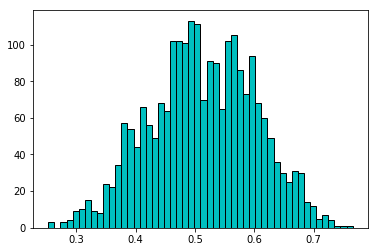

In [201]:
plt.hist(clipped_preds, bins=50, color='c', edgecolor='black');

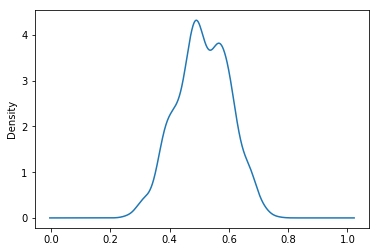

In [202]:
df_sample_sub2.Pred.plot.kde();

In [231]:
df_results = pd.DataFrame(columns=['WTeam','LTeam','Prob'])

i = 0
for ii, row in df_sample_sub2.iterrows():
    year, t1, t2 = get_year_t1_t2(row.ID)
    
    df_results.loc[i] = [df_teams[df_teams.TeamID == t1].TeamName.values[0],df_teams[df_teams.TeamID == t2].TeamName.values[0], row.Pred]
    i=i+1

In [232]:
df_results.head()

,WTeam,LTeam,Prob
0,Alabama,Arizona,0.387207
1,Alabama,Arizona St,0.526642
2,Alabama,Arkansas,0.433756
3,Alabama,Auburn,0.595473
4,Alabama,Bucknell,0.499629


In [233]:
df_results.to_csv('basic_log_reg_results.csv', index=False)